## Regression

* Using a model to predict numerical data
  * Salaries, statistics, age, sizes, etc.

## 2 Examples of Linear regression

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Linear_Function_Graph.svg/300px-Linear_Function_Graph.svg.png)

## Example: Plotting number of suicides and US science spending

* Pandas: A library for reading data files
  * We'll cover this much more in depth later
  
```python
import pandas
```

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("data/science.csv")
data

,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


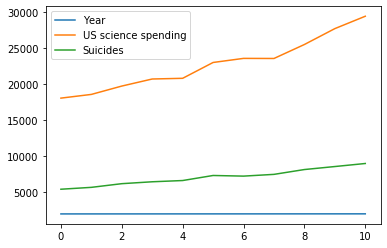

In [2]:
data.plot()

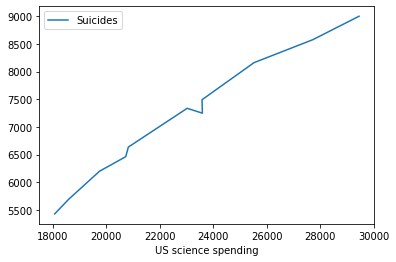

In [3]:
# Errrm, ups, what I really wanted was the science spending on the x axis and the suicides on the Y
data.plot(x = 1, y = 2)

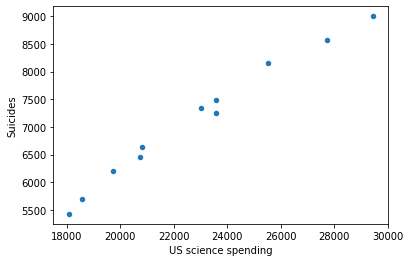

In [4]:
# Ok, but why the line? Let's do a scatter plot
data.plot.scatter(x = 1, y = 2)

## Uh, looks close to a line, right?! Let's try to draw a straight line between the points


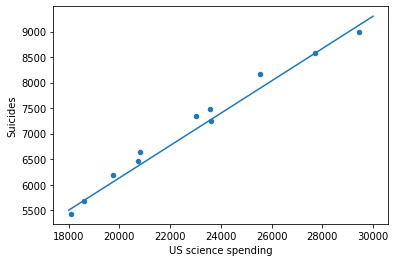

In [5]:
import matplotlib.pyplot as plt
data.plot.scatter(x = 1, y = 2)
plt.plot([18000, 30000], [5500, 9300])

## We can now do predictions about the future!

We can simply look at the graph to find out how many suicides we will have if we change the US science spending.

* Unfortunately it's pretty hard to read it out graphically, so let's get the formula (the grade and the intercept, alpha and beta)

$y = \alpha x + \beta$  
$\alpha = \frac{\delta y}{\delta x}$    
$\beta = y - \alpha x$  

$P1 = (18000,5500)$  
$P2 = (30000,9300)$  

$\delta x = (30000-18000)$  
$\delta y = (9300-5500)$  

grade = (9300-5500)/(30000-18000) = 0.32  
intercept = (5500 - 0.32*18000) = -260

Resulting formula:  
$y = 0.32x - 260$

So now given any x we can predict y


Above We found the slope of the triangle ($\alpha$). And then we can use the slope to extrapolate the point $(18000, 5500)$ 


## Introducing sklearn

* **Scikit-learn** is a pretty cool machine learning framework with a lot of tools
  * https://scikit-learn.org/

## Introduction to linear regression with sklearn
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [6]:
import sklearn

## Improving our model

* Before, I was just taking a random guess on what was a good model, luckily `sklearn` is much better at guessing than we are.
  * We can use `sklearn` to construct a `LinearRegression` model
  
* **Regression** means approaching a better model
  * So we are actively trying to find the perfect linear model ($\alpha x + \beta$) that fits our data
  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [7]:
import sklearn.linear_model

## Fitting a model

* Now that we know what model to use, we have to **train** it or **fit** it to our data

In [8]:
xs = data['US science spending']
ys = data['Suicides']

## reshape data for x (independent feature variables)
sklearn.linear_model.LinearRegression().fit(x,y,sample_weight)  
X: array-like, shape (n_samples, n_features) where amount of features are the unknown input variables  
y: array-like, shape (n_samples)  

In [9]:

xs_reshape = np.array(xs).reshape(-1, 1)
print(xs.shape)
print(xs_reshape.shape)

(11,)
(11, 1)


In [10]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Note:** sklearn expects the `xs` as an array of at least one element (for reasons we will se later)

In [11]:
model.coef_

array([0.31270829])

In [12]:
model.intercept_

-21.489696197675585

## You can now use the model to predict

In [13]:
predicted = model.predict(xs_reshape)
spending10000 = model.predict([[10000]])
print('Spending 10000 on Science means {} will commit suicide'.format(spending10000[0]))
predicted

Spending 10000 on Science means 3105.5932216350757 will commit suicide


array([5631.96351095, 5793.00828122, 6155.4371914 , 6462.20402564,
       6492.53672994, 7179.86955528, 7357.48786501, 7353.42265722,
       7960.38945157, 8650.22394324, 9187.45678853])

## Exercise linear regression model
Are there a linear relationship here in this csv data:
```csv
year,GDP(trillion),4wheeler_car_sale
2011,6.2,26.3
2012,6.5,26.65
2013,5.48,25.03
2014,6.54,26.01
2015,7.18,27.9
2016,7.93,30.47
```
1. save data in a file: car_sales.csv
2. plot car sales as a function to GDP (is there a linear relationship?)
3. fit data to a klearn linear regression model
4. predict sales if GDP hits 9 trillion lakhs

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("data/car_sales.csv")
data

,year,GDP(trillion),4wheeler_car_sale
0,2011,6.20,26.30
1,2012,6.50,26.65
2,2013,5.48,25.03
3,2014,6.54,26.01
4,2015,7.18,27.90
5,2016,7.93,30.47


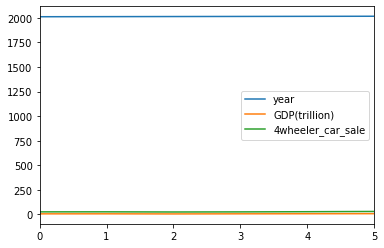

In [6]:
data.plot()